In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# esta la funcion de apriori
from apyori import apriori


#### carga de arhivo
#### url segun el video de la uc

In [5]:
df = pd.read_csv("retail_dataset.csv")
df.head()


,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


### preprocesamiento


In [6]:
items = (df['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [7]:
df.describe(include="all")

,0,1,2,3,4,5,6
count,315,285,245,187,133,71,41
unique,9,9,9,9,9,9,9
top,Bread,Meat,Eggs,Milk,Wine,Pencil,Bread
freq,74,47,52,45,36,13,11


In [8]:
### - pasando los datos a listas

In [10]:

m = df.shape[0]
transaction = []

for i in range(0, m):
    trans = []
    m = df.shape[1]
    for j in range(0, m):
        itm = str(df.values[i, j])
        if itm != "nan":
            trans.append(itm)
        transaction.append(trans)
transaction


[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Cheese', 'Meat', 'Eggs', 'Mi

### reglas de asociacion APRIORI

In [14]:
assoc_rules = apriori(transaction, min_suport = 0.2, min_confidence=0.5, min_lift=1.1, min_legth=3)
assoc_res = list(assoc_rules)
print("numero de reglas de asociacion : ", len(assoc_res))

numero de reglas de asociacion :  67


In [23]:
# entregar el valor de APRIORI para pasarlos a un df
ar = pd.DataFrame(assoc_res)
ar_in = pd.DataFrame([assoc_res[i][2][0] for i in range(len(assoc_res))])
rules = pd.concat([ar, ar_in] , axis=1, sort=False)[["items", "support", "items_base", "items_add", "confidence", "lift"]]

rules.columns = ["items", "support", "antescedente", "consecuente", "confidence", "lift"]
rules = rules[["items", "antescedente", "consecuente", "support", "confidence", "lift"]]
rules = rules.sort_values(by=["support"], inplace=False, ascending=False )
rules.head()

,items,antescedente,consecuente,support,confidence,lift
5,"(Cheese, Meat)",(Cheese),(Meat),0.323810,0.645570,1.355696
6,"(Cheese, Milk)",(Cheese),(Milk),0.304762,0.607595,1.211344
4,"(Cheese, Eggs)",(Cheese),(Eggs),0.298413,0.594937,1.358008
0,"(Bagel, Bread)",(Bagel),(Bread),0.279365,0.656716,1.301042
2,"(Milk, Bread)",(Bread),(Milk),0.279365,0.553459,1.103415


Text(0.5, 1.0, 'Soporte vs Confidence')

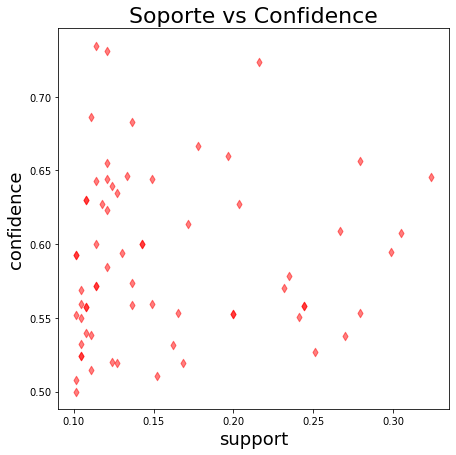

In [28]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(rules['support'], rules["confidence"], color="red", marker="d", alpha=0.5)
ax.set_xlabel('support', fontsize=18)
ax.set_ylabel("confidence", fontsize=18)
ax.set_title("Soporte vs Confidence", fontsize=22)

Text(0.5, 1.0, 'Soporte vs lift')

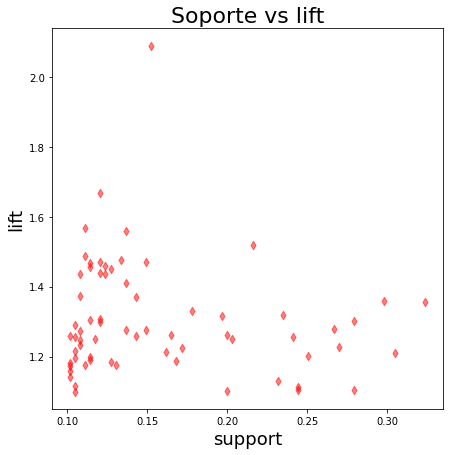

In [29]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(rules['support'], rules["lift"], color="red", marker="d", alpha=0.5)
ax.set_xlabel('support', fontsize=18)
ax.set_ylabel("lift", fontsize=18)
ax.set_title("Soporte vs lift", fontsize=22)

# fig, ax = plt.subplots(figsize = (7,7))


Text(0.5, 1.0, 'lift vs Confidence')

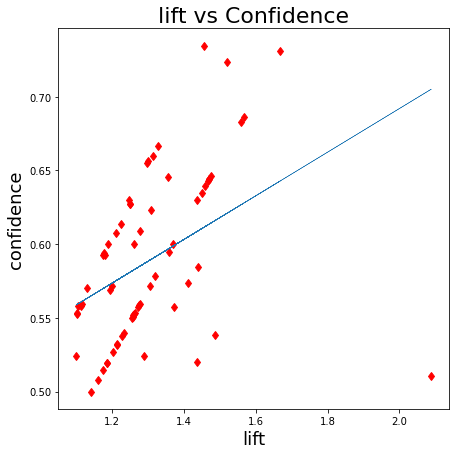

In [40]:
fig, ax = plt.subplots(figsize = (7,7))
fit = np.polyfit(rules["lift"], rules["confidence"], 1)
fit_fn = np.poly1d(fit)
ax.plot(rules['lift'], rules["confidence"], "rd", rules["lift"], fit_fn(rules["lift"]), linewidth=0.5)
ax.set_xlabel('lift', fontsize=18)
ax.set_ylabel("confidence", fontsize=18)
ax.set_title("lift vs Confidence", fontsize=22)

In [41]:
help(apriori)

Help on function apriori in module apyori:

apriori(transactions, **kwargs)
    Executes Apriori algorithm and returns a RelationRecord generator.
    
    Arguments:
        transactions -- A transaction iterable object
                        (eg. [['A', 'B'], ['B', 'C']]).
    
    Keyword arguments:
        min_support -- The minimum support of relations (float).
        min_confidence -- The minimum confidence of relations (float).
        min_lift -- The minimum lift of relations (float).
        max_length -- The maximum length of the relation (integer).

